<a href="https://colab.research.google.com/github/Gopikanta/Digital-Image-Processing/blob/main/DIP_LAB_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

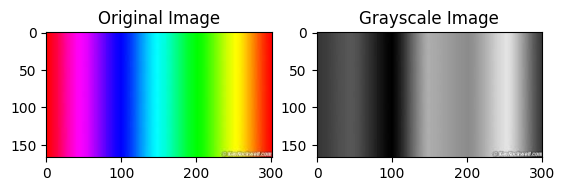

In [ ]:

# 1 .  Read an image and convert it into gray scale image without using builtin function for the function
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = "/content/ml2.jpg"  # Replace with the actual path to your image
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Get the dimensions of the image
height, width, _ = image_array.shape

# Create a new array for the grayscale image
gray_image_array = np.zeros((height, width), dtype=np.uint8)

# Convert each pixel to grayscale using the formula: Y = 0.299*R + 0.587*G + 0.114*B
for i in range(height):
    for j in range(width):
        gray_image_array[i, j] = int(0.299 * image_array[i, j, 0] +
                                     0.587 * image_array[i, j, 1] +
                                     0.114 * image_array[i, j, 2])

# Display the original and grayscale images
plt.subplot(1, 2, 1)
plt.imshow(image_array)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gray_image_array, cmap='gray')
plt.title('Grayscale Image')

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

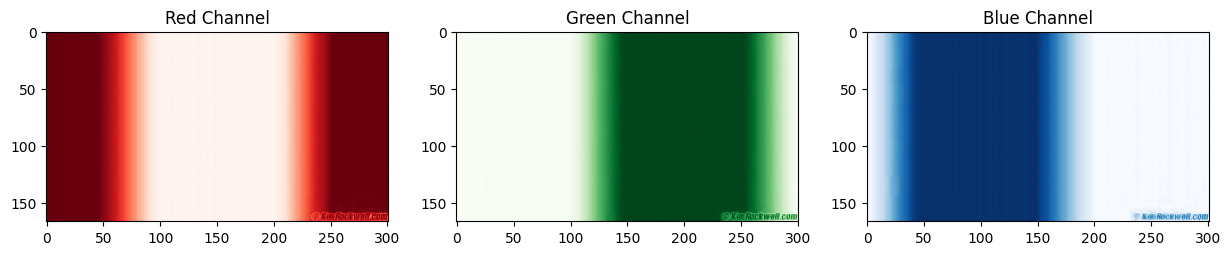

In [ ]:
# 2 .  Read an image and display the RGB channel images separately

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = "/content/ml2.jpg"  # Replace with the actual path to your image
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Get the dimensions of the image
height, width, _ = image_array.shape

# Display the RGB channel images separately
plt.figure(figsize=(15, 5))

# Red channel
plt.subplot(1, 3, 1)
plt.imshow(image_array[:, :, 0], cmap='Reds')
plt.title('Red Channel')

# Green channel
plt.subplot(1, 3, 2)
plt.imshow(image_array[:, :, 1], cmap='Greens')
plt.title('Green Channel')

# Blue channel
plt.subplot(1, 3, 3)
plt.imshow(image_array[:, :, 2], cmap='Blues')
plt.title('Blue Channel')

plt.show()


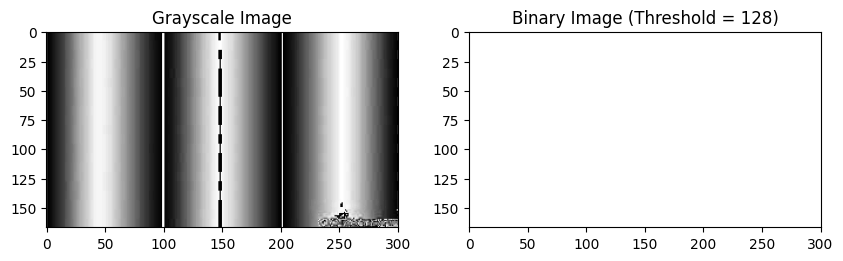

In [ ]:
# 3 . Read an image and convert it into binary image using threshold.

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = "/content/ml2.jpg"  # Replace with the actual path to your image
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Convert the image to grayscale
gray_image = np.mean(image_array, axis=2, dtype=np.uint8)

# Set a threshold for binarization (adjust as needed)
threshold = 128

# Create a binary image
binary_image = (gray_image > threshold).astype(np.uint8) * 255

# Display the original and binary images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='binary')
plt.title('Binary Image (Threshold = {})'.format(threshold))

plt.show()


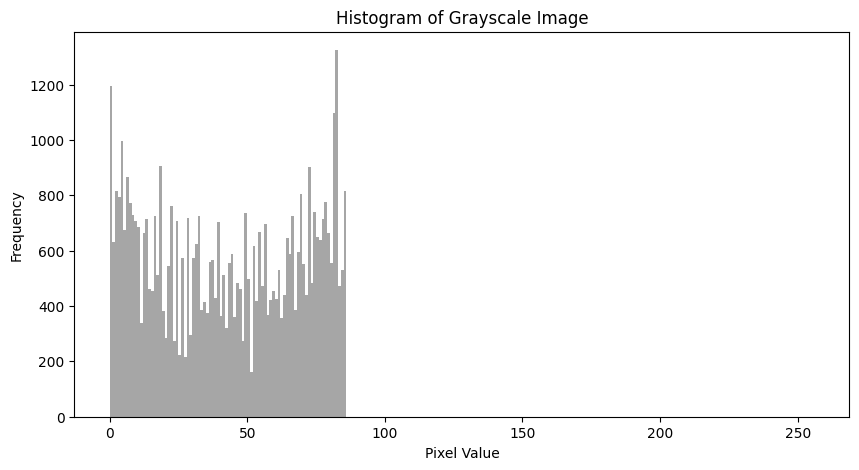

In [ ]:
# 4 . Display the histogram of the gray scale image.
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = "/content/ml2.jpg"  # Replace with the actual path to your image
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Convert the image to grayscale
gray_image = np.mean(image_array, axis=2, dtype=np.uint8)

# Display the histogram of the grayscale image
plt.figure(figsize=(10, 5))
plt.hist(gray_image.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


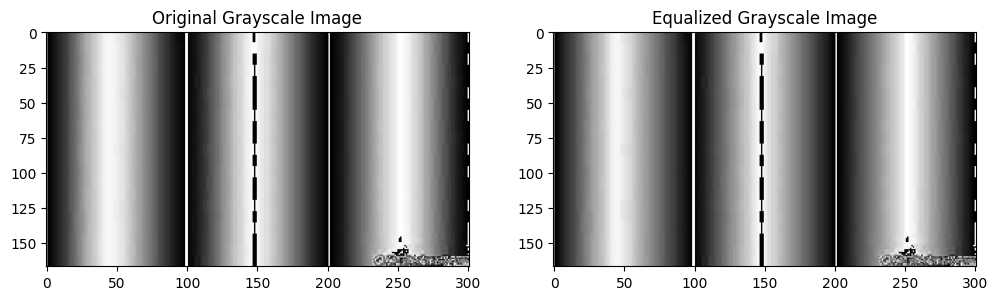

In [ ]:
# 5 . Apply histogram equalization on an image and display the resultant image.

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = "/content/ml2.jpg"  # Replace with the actual path to your image
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Convert the image to grayscale
gray_image = np.mean(image_array, axis=2, dtype=np.uint8)

# Calculate the histogram of the grayscale image
hist, bins = np.histogram(gray_image.flatten(), bins=256, range=[0, 256])

# Calculate the cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize the CDF to scale it between 0 and 1
cdf_normalized = cdf / cdf.max()

# Perform histogram equalization
equalized_image = np.interp(gray_image.flatten(), bins[:-1], cdf_normalized * 255).reshape(gray_image.shape).astype(np.uint8)

# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Grayscale Image')

plt.show()


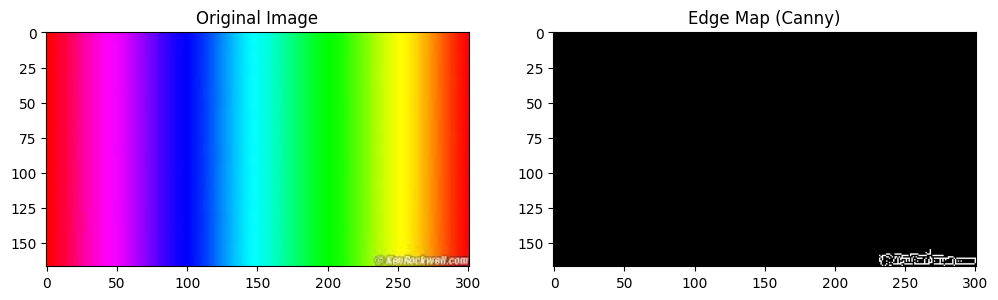

In [ ]:
# 6 . Display the edge map of an image with any edge detection algorithm

import matplotlib.pyplot as plt
import cv2
from PIL import Image

# Load the image
image_path = "/content/ml2.jpg"  # Replace with the actual path to your image
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 50, 150)

# Display the original and edge map images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_array)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Map (Canny)')

plt.show()


In [ ]:
# 7 . Download any OCR dataset and perform the classification with SVM and KNN.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load the MNIST dataset
digits = datasets.load_digits()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) classification
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# K-Nearest Neighbors (KNN) classification
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Evaluate and compare the results
svm_accuracy = metrics.accuracy_score(y_test, svm_predictions)
knn_accuracy = metrics.accuracy_score(y_test, knn_predictions)

print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)


SVM Accuracy: 0.9861111111111112
KNN Accuracy: 0.9861111111111112


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


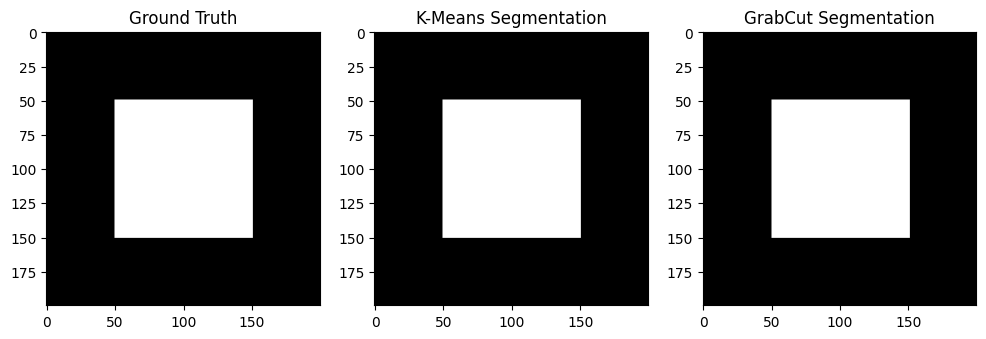

In [ ]:
# 8 . Implement any two segmentation algorithms and compare the efficiency with ground truth.

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic image with two regions
image_size = (200, 200)
image = np.zeros(image_size, dtype=np.uint8)
cv2.rectangle(image, (50, 50), (150, 150), 255, -1)

# Display ground truth
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Ground Truth')

# K-Means Clustering
kmeans_image = image.reshape((-1, 1))
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(kmeans_image)
segmented_kmeans = kmeans.labels_.reshape(image_size)

# Display K-Means result
plt.subplot(1, 3, 2)
plt.imshow(segmented_kmeans, cmap='gray')
plt.title('K-Means Segmentation')

# Convert grayscale image to 3 channels
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# GrabCut
rect = (50, 50, 150, 150)
mask = np.zeros(image_size, dtype=np.uint8)
bgd_model = np.zeros((1, 65), dtype=np.float64)
fgd_model = np.zeros((1, 65), dtype=np.float64)
cv2.grabCut(image_color, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify mask to create binary segmentation result
segmented_grabcut = np.where((mask == 2) | (mask == 0), 0, 1)

# Display GrabCut result
plt.subplot(1, 3, 3)
plt.imshow(segmented_grabcut, cmap='gray')
plt.title('GrabCut Segmentation')

plt.show()


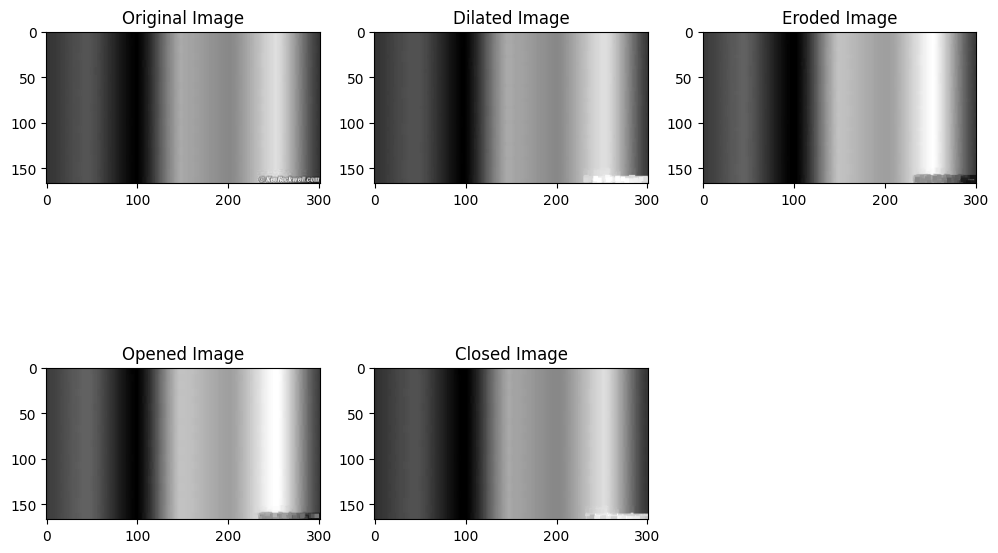

In [ ]:
# 9 . Input an image and perform the following morphological operations
# i) Dilation
# ii) Erosion
# iii) Opening
# iv) Closing
# Display the results

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
image_path = "/content/ml2.jpg"  # Replace with the actual path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform Dilation
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Perform Erosion
eroded_image = cv2.erode(image, kernel, iterations=1)

# Perform Opening (Erosion followed by Dilation)
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Perform Closing (Dilation followed by Erosion)
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display the original and processed images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.subplot(2, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.subplot(2, 3, 4)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')

plt.subplot(2, 3, 5)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

plt.show()


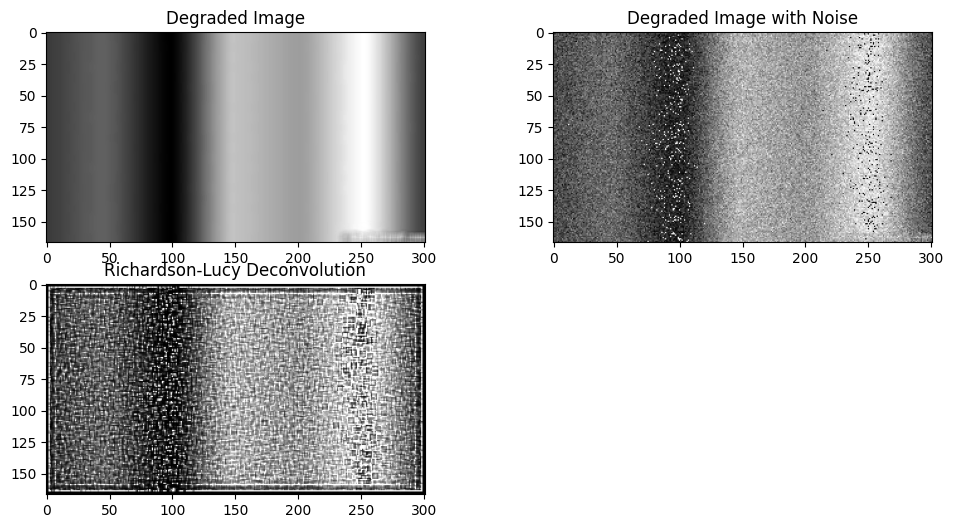

In [ ]:
# 10 . Implement any image restoration algorithm
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Load a degraded image
image_path = "/content/ml2.jpg"  # Replace with the actual path to your degraded image
degraded_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Simulate a point spread function (PSF)
psf_size = 5
psf = np.ones((psf_size, psf_size), np.float32) / psf_size**2

# Convolve the degraded image with the PSF to simulate degradation
degraded_image = cv2.filter2D(degraded_image, -1, psf)

# Simulate the addition of noise to the degraded image
noise_stddev = 25
noise = np.random.normal(0, noise_stddev, degraded_image.shape).astype(np.uint8)
degraded_image_with_noise = degraded_image + noise

# Richardson-Lucy Deconvolution
def richardson_lucy_deconvolution(image, psf, num_iterations=30):
    img_estimate = np.full_like(image, 0.5, dtype=np.float32)  # Ensure float32 for intermediate calculations

    for _ in range(num_iterations):
        relative_blur = image / (convolve2d(img_estimate, psf, 'same') + 1e-10)
        img_estimate *= convolve2d(relative_blur, np.flip(psf), 'same')

    return np.clip(img_estimate, 0, 255).astype(np.uint8)  # Clip values and cast back to uint8 for display

# Deconvolve the image
estimated_image = richardson_lucy_deconvolution(degraded_image_with_noise, psf)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(degraded_image, cmap='gray')
plt.title('Degraded Image')

plt.subplot(2, 2, 2)
plt.imshow(degraded_image_with_noise, cmap='gray')
plt.title('Degraded Image with Noise')

plt.subplot(2, 2, 3)
plt.imshow(estimated_image, cmap='gray')
plt.title('Richardson-Lucy Deconvolution')

plt.show()
